<pre>
                                  __  __ _____  _      ______ _____ _______
                                 |  \/  |  __ \| |    |  ____|_   _|__   __|
                                 | \  / | |  | | |    | |__    | |    | |
                                 | |\/| | |  | | |    |  __|   | |    | |
                                 | |  | | |__| | |____| |     _| |_   | |
                                 |_|  |_|_____/|______|_|    |_____|  |_|

                               music encoding using minimum description length

</pre>
## <center> Compute all models</center>      

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import mdlfit as mf

### Introduction

Says something here ... give some context ... exlpain the goals of this Notebook. 

In [2]:
def fit_all_models_and_precisions(dataset_string, signature='4/4', beat_subdivisions=2,
                                  data_folder='../data/encoded/', min_val=1, max_val=12):
    """Fit all models for the given dataset, searching for optimal precision.

    Parameters
    ----------
    dataset_string : str
        the name of the dataset as used in the encoding, for instance, as defined in music21
        (e.g. 'airdsAirs', 'oneills1850', 'EssenFolksong')
    signature : str
        string denoting the time signature (e.g. 4/4, 2/4).
        Only pieces with that time signature (exclusively) will be encoded.
    beat_subdivisions : int
        number of (equal) subdivisions of each beat.
    data_folder : str
        Name of the folder containing the data, i.e. the pickle files
    min_val : int
        Sets minimum value of the precision grid as 2**min_val.
    max_val : int
        Sets maximum value of the precision grid as 2**max_val.
        
    Returns
    -------
    optimal_models : list
        list of the description length for each model for the different precision values
    """

    # strings for the signature and beat_subdivision
    signature_subdivisions = signature.replace('/', '') + "_" + str(beat_subdivisions)
    # dataset filename
    dataset_filename = dataset_string + "_" + signature_subdivisions + ".pkl"

    # load encoded the dataset
    dataset = mf.dataio.load_encoded_dataset(data_folder + dataset_filename)

    # model names
    model_names = ['Bernoulli', 'Position', 'RefinedPosition',
                   'Hierarchical', 'RefinedHierarchical']

    # optimal models
    optimal_models = []

    # precision grid of values
    precision_grid = [2**k for k in range(min_val, max_val+1)]

    # for each model
    for model_name in model_names:
        ## resulting model (parameters may vary) for the given precisions
        models = []

        # for each precision
        for precision in precision_grid:
            # create model
            model = mf.models.createModel(model_name, dataset, signature, beat_subdivisions,
                                          d=precision)
            # save model
            models.append(model)

        # description length for each model
        dls = np.array([model.dl for model in models])

        # create dictionary corresponding to current piece
        dict_models = {"model": model_name, "description lengths": dls}

        optimal_models.append(dict_models)
    
    return optimal_models

/home/rocamora/investigacion/software/mdlfit/mdlfit-master/examples/mdlfit/util.py:43: RuntimeWarning: divide by zero encountered in log2
  logval = np.log2(value)
/home/rocamora/investigacion/software/mdlfit/mdlfit-master/examples/mdlfit/util.py:48: RuntimeWarning: Warning: nan value found, substitued by zero. 
  warnings.warn("Warning: nan value found, substitued by zero. ", RuntimeWarning)
/home/rocamora/investigacion/software/mdlfit/mdlfit-master/examples/mdlfit/util.py:43: RuntimeWarning: divide by zero encountered in log2
  logval = np.log2(value)
/home/rocamora/investigacion/software/mdlfit/mdlfit-master/examples/mdlfit/util.py:48: RuntimeWarning: Warning: nan value found, substitued by zero. 
  warnings.warn("Warning: nan value found, substitued by zero. ", RuntimeWarning)
/home/rocamora/investigacion/software/mdlfit/mdlfit-master/examples/mdlfit/util.py:43: RuntimeWarning: divide by zero encountered in log2
  logval = np.log2(value)
/home/rocamora/investigacion/software/mdlfit

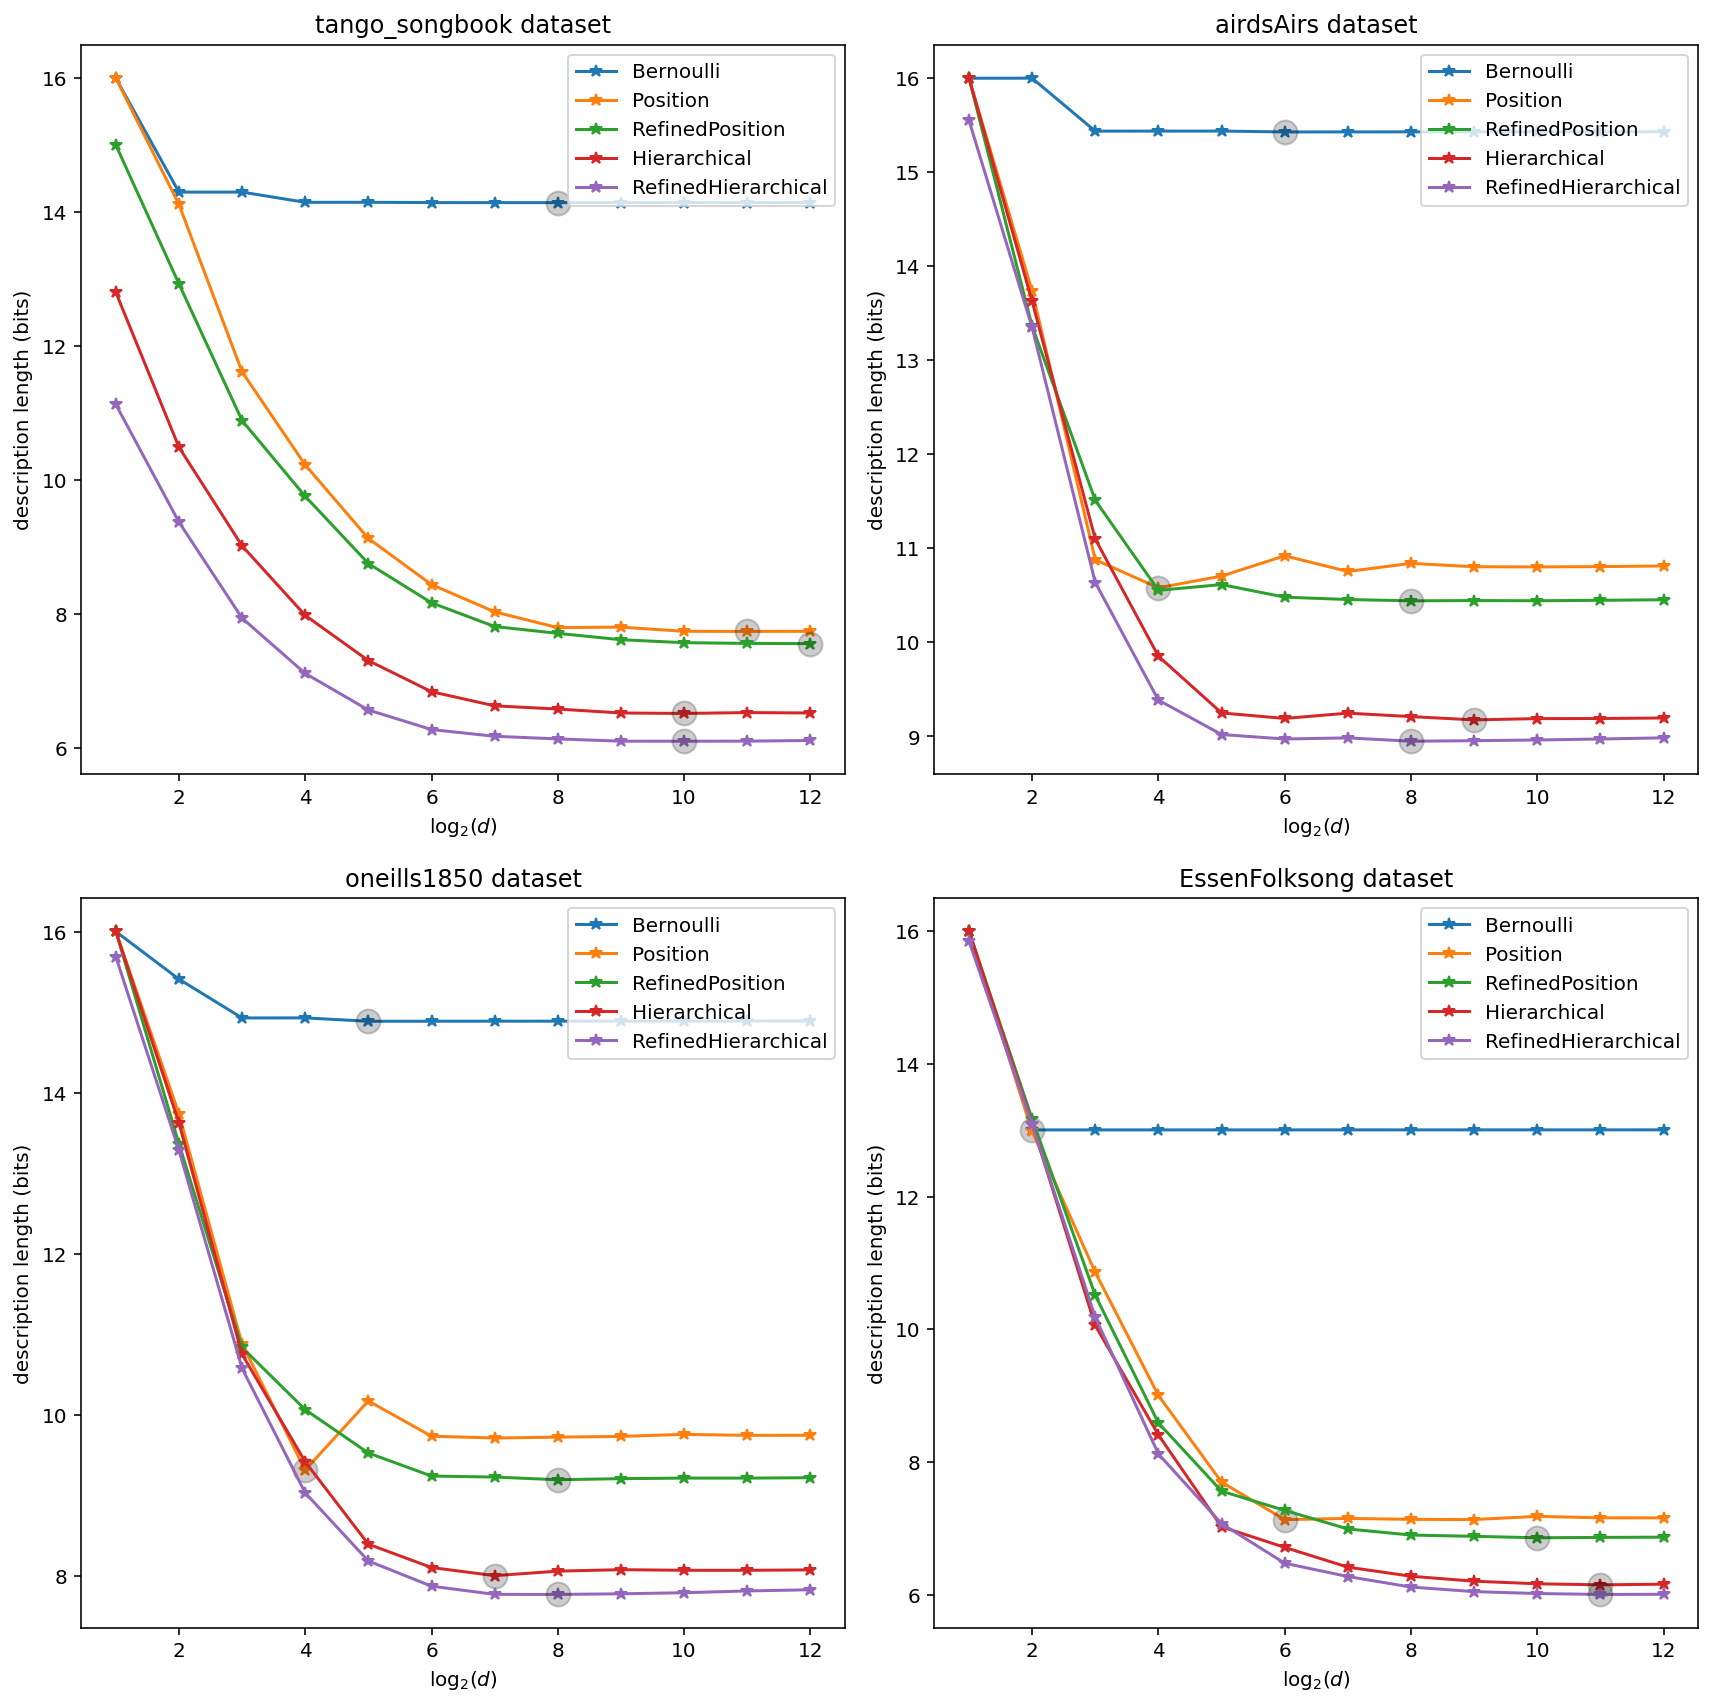

In [8]:
# time signature
signature = '4/4'
# signature = '2/4'
# subdivisions per beat
# beat_subdivisions = 2
beat_subdivisions = 4
# location of the encoded data
data_folder = '../data/encoded/'
# minimum and maximum value of the precision grid (2**min_val 2**max_val)
min_val = 1
max_val = 12

# dataset names
datasets = ['tango_songbook', 'airdsAirs', 'oneills1850', 'EssenFolksong']
# datasets = ['airdsAirs', 'oneills1850', 'EssenFolksong']

# model names
model_names = ['Bernoulli', 'Position', 'RefinedPosition', 'Hierarchical', 'RefinedHierarchical']

plt.figure(figsize=(12,12))
grid_exp = range(min_val, max_val+1)

# for each dataset
for indd, dataset in enumerate(datasets):
    
    # fit all models for the different precision values
    optimal_models = fit_all_models_and_precisions(dataset, 
                                                   signature=signature, 
                                                   beat_subdivisions=beat_subdivisions,
                                                   data_folder=data_folder, 
                                                   min_val=min_val,
                                                   max_val=max_val)
    
    plt.subplot(2, 2, indd+1)

    # for each model 
    for indm, model_name in enumerate(model_names):

        # description lengths for model
        description_lengths = optimal_models[indm]['description lengths']
        # find index of the model with the minunim description length
        argmin = np.argmin(description_lengths)

        plt.plot(grid_exp, description_lengths, '-*', label=model_name)
        plt.plot(grid_exp[argmin], description_lengths[argmin], 'ok', markersize=12, alpha=0.2)

    plt.legend(loc='upper right')
    plt.xlabel("$\\log_2(d)$")
    plt.ylabel("description length (bits)")
    plt.title(dataset + " dataset")

plt.tight_layout()